# **RNN Introduction**


## Importing required libraries


In [1]:
!pip install mplfinance
!pip install opendatasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.5 MB/s eta 0:00:00


In [39]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# For processing
import math
import random
import datetime as dt
import matplotlib.dates as mdates

# For visualization
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc

# Libraries for model training
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

## Loading and preprocessing the data
### Dataset 4-Deep learning/5-Time Series Forecasting (RNN)/LAB/ٌDatasets/traffic.csv

In [40]:
df = pd.read_csv('/content/traffic.csv')
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Junction,48120.0,2.180549e+00,9.669554e-01,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00
Vehicles,48120.0,2.279133e+01,2.075006e+01,1.000000e+00,9.000000e+00,1.500000e+01,2.900000e+01,1.800000e+02
ID,48120.0,2.016330e+10,5.944854e+06,2.015110e+10,2.016042e+10,2.016093e+10,2.017023e+10,2.017063e+10


In [43]:
df.isnull().sum()

,0
DateTime,0
Junction,0
Vehicles,0
ID,0


In [44]:
def specific_data(company, start, end):
    company_data = df[df['Vehicles'] == company]
    date_filtered_data = company_data[(company_data['DateTime'] > start) & (company_data['DateTime'] < end)]
    return date_filtered_data

## Visualization

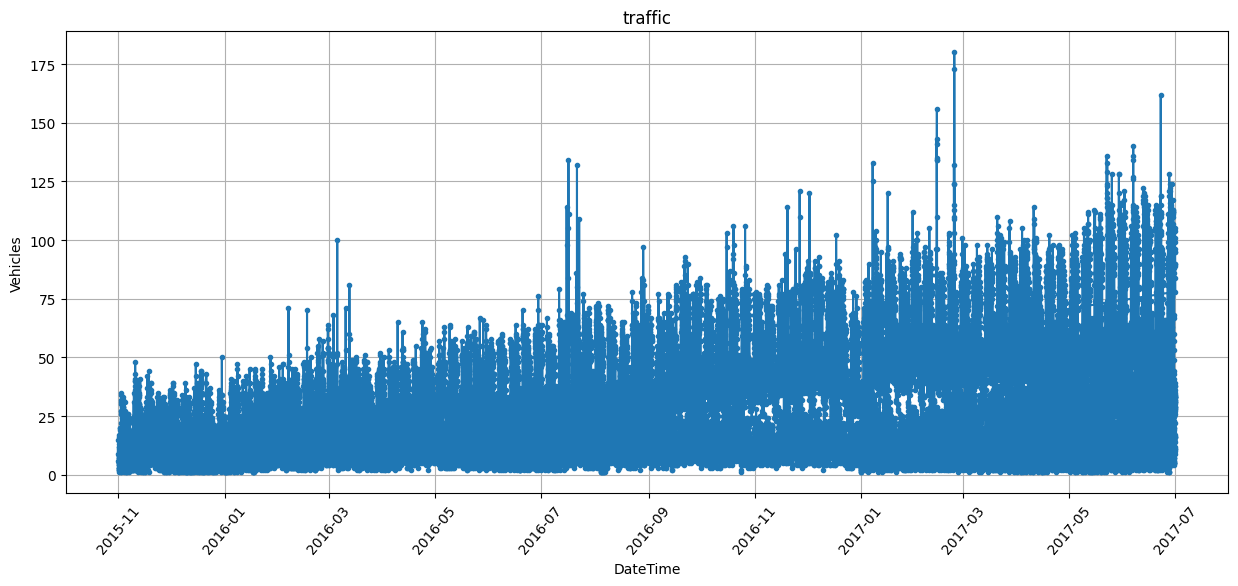

In [45]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

plt.figure(figsize=(15, 6))
plt.plot(df['DateTime'], df['Vehicles'], marker='.')
plt.title('traffic')
plt.xlabel('DateTime')
plt.ylabel('Vehicles')
plt.xticks(rotation=50)
plt.grid(True)
plt.show()

## Split the data into train and test

In [46]:
X=df.drop(['DateTime'],axis=1)
y=df['DateTime']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Modeling


In [67]:
# Initialize a sequential model
model = Sequential()

# First RNN layer with 50 units, input shape, and return sequences
model.add(SimpleRNN(units=8, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))         # Adding dropout to prevent overfitting

# Second RNN layer with 50 units and return sequences
model.add(SimpleRNN(units=8, return_sequences=True))
model.add(Dropout(0.2))

# Third RNN layer with 50 units
model.add(SimpleRNN(units=8))
model.add(Dropout(0.2))

# Add a dense output layer with one unit
model.add(Dense(units=1))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_9 (SimpleRNN)             │ (None, 3, 8)                │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 3, 8)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_10 (SimpleRNN)            │ (None, 3, 8)                │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 3, 8)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_11 (SimpleRNN)            │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 361 (1.41 KB)

 Trainable params: 361 (1.41 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [69]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
ros = RandomOverSampler(random_state=42)
X_resampl, y_resampl = ros.fit_resample(X, y)

In [71]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_resampl, y_resampl, test_size=0.2, random_state=42)


In [73]:
if y_train.dtype == 'datetime64[ns]':
    #  Convert to Unix timestamps (seconds since epoch)
    y_train = (y_train - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')





In [76]:
if y_test.dtype == 'datetime64[ns]':
    #  Convert to Unix timestamps (seconds since epoch)
    y_test = (y_test - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [77]:

checkpoints = ModelCheckpoint(filepath = 'my_weights.keras', save_best_only = True)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train, y_train,
          validation_data=(X_test,y_test),
          epochs=50,
          batch_size=32,
          verbose=1,
          callbacks= [checkpoints, early_stopping])

Epoch 1/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 2168841523930595328.0000 - val_loss: 2168611038805622784.0000
Epoch 2/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 2168990782634065920.0000 - val_loss: 2168610763927715840.0000
Epoch 3/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 2169022668471271424.0000 - val_loss: 2168610763927715840.0000
Epoch 4/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 2169042597119524864.0000 - val_loss: 2168610763927715840.0000
Epoch 5/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 2168710407168983040.0000 - val_loss: 2168610763927715840.0000
Epoch 6/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 2168775690671882240.0000 - val_loss: 2168610763927715840.0000
Epoch 7/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 2168852519046873088.0000 - val_loss: 2168610763927715840.0000
Epoch 8/50
1460/1460 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 2169112553546842112.0000 - val_loss: 2168610763927715840.0000
Ep

In [78]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

1460/1460 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


## Visualization of results


Epoch 1/20
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 2168923849863725056.0000 - val_loss: 2169159832546836480.0000
Epoch 2/20
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 2168220712177762304.0000 - val_loss: 2169159832546836480.0000
Epoch 3/20
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 2168782425180602368.0000 - val_loss: 2169159832546836480.0000
Epoch 4/20
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 2168475661436452864.0000 - val_loss: 2169159832546836480.0000
Epoch 5/20
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 2169300707474145280.0000 - val_loss: 2169159832546836480.0000
Epoch 6/20
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 2168445012549828608.0000 - val_loss: 2169159557668929536.0000
Epoch 7/20
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 2168836026372456448.0000 - val_loss: 2169159557668929536.0000
Epoch 8/20
1168/1168 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 2168557849930629120.0000 - val_loss: 2169159557668929536.0000
Epoch 

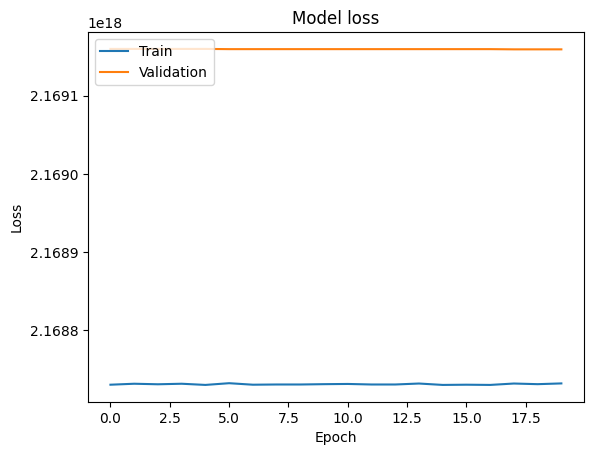

In [85]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)



plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
